# Data Connections (MERRA-2), Data connection BETR, Maps Creations and and Motion 
MS: Extension for different format, movies etc.

***

## I. Data Connections (MERRA-2) Overview:
This How-To shows how to read and plot NetCDF4 data from the Modern-Era Retrospective analysis for Research and Applications version 2 (MERRA-2) using Python.

### Example:
**Example data:** MERRA-2 Monthly 0.5 x 0.625 degree 2 meter air temperature (M2TMNXSLV_V5.12.4) for January 2010.



## Prerequisites:

Python and the free packages: [numpy](http://www.numpy.org/), [netCDF4](http://unidata.github.io/netcdf4-python/), [matplotlib](http://matplotlib.org/), and [cartopy](https://scitools.org.uk/cartopy/docs/latest/). Matplotlib and cartopy are only needed for plotting. This script was tested using Python 3.7.

## Procedure:
The user must register with Earthdata to access the data. To register, follow the steps at: [data-access](https://disc.gsfc.nasa.gov/data-access)

1. After registering with Earthdata, go to https://disc.gsfc.nasa.gov/

2. Search for ‘M2TMNXSLV_5.12.4’ and click on the dataset link.

3. Once on the dataset page, the data can be accessed by multiple means in the ‘Data Access’ box. For this HowTo, we will use an https service by clicking ‘Online Archive’.

    - Click on the ‘2010’ folder and download the ‘[MERRA2_300.tavgM_2d_slv_Nx.201001.nc4](https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2_MONTHLY/M2TMNXSLV.5.12.4/2010/MERRA2_300.tavgM_2d_slv_Nx.201001.nc4)’ file.
    

4. Run the following Python cells which will demonstrate how to read-in and plot 3-dimensional NetCDF data in Python

The first step is to import the required Python libraries. They are used to read and plot the data. If any of the following import commands fail, check the local Python environment and install any missing packages. 

In [1]:
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install netCDF4
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install cartopy
#!conda install --yes --prefix {sys.prefix} cartopy

#import numpy as np
#from netCDF4 import Dataset
#import matplotlib.pyplot as plt
#import cartopy.crs as ccrs

Solving environment: done

# All requested packages already installed.



Open the NetCDF4 file (add a directory path if necessary) for reading:

In [2]:
#data = Dataset('MERRA2_300.tavgM_2d_slv_Nx.201001.nc4', mode='r')

Run the following line below to print MERRA2 metadata. This line will print attribute and variable information. From the 'variables(dimensions)' list, choose which variable(s) to read in below.

In [3]:
#print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Fri Jul  3 02:53:08 2015 GMT
    Filename: MERRA2_300.tavgM_2d_slv_Nx.201001.nc4
    Comment: GMAO filename: d5124_m2_jan00.tavg1_2d_slv_Nx.monthly.201001.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2TMNXSLV
    RangeBeginningDate: 2010-01-01
    RangeEndingDate: 2010-01-31
    GranuleID: MERRA2_300.tavgM_2d_slv_Nx.201001.nc4
    ProductionDateTime: Original file generated: Fri Jul  3 02:53:08 2015 GMT
    LongName: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Single-Level Diagnostics Monthly Mean
    Title: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Averaged,S

Read in 'T2M' 2-meter air temperature variable:

In [4]:
##print(data.variables['lon'][:])
#lons = data.variables['lon'][:]
#lats = data.variables['lat'][:]
#lon, lat = np.meshgrid(lons, lats)
#T2M = data.variables['T2M'][:,:,:]
#print(T2M)

[[[246.5382  246.5382  246.5382  ... 246.5382  246.5382  246.5382 ]
  [245.76541 245.76825 245.77145 ... 245.757   245.75964 245.76253]
  [244.91208 244.91805 244.92424 ... 244.89542 244.90085 244.90636]
  ...
  [242.43242 242.42134 242.41017 ... 242.46556 242.45447 242.44328]
  [242.5045  242.49892 242.49344 ... 242.52153 242.51578 242.51013]
  [242.77005 242.77005 242.77005 ... 242.77005 242.77005 242.77005]]]


If using MERRA-2 data with multiple time indices in the file, the following line will extract only the first time index.  
_Note: Changing T2M\[0,:,:\] to T2M\[10,:,:\] will subset the 11th time index instead of the first._

In [59]:
#T2M = T2M[0,:,:]
#print(T2M)

[[246.5382  246.5382  246.5382  ... 246.5382  246.5382  246.5382 ]
 [245.76541 245.76825 245.77145 ... 245.757   245.75964 245.76253]
 [244.91208 244.91805 244.92424 ... 244.89542 244.90085 244.90636]
 ...
 [242.43242 242.42134 242.41017 ... 242.46556 242.45447 242.44328]
 [242.5045  242.49892 242.49344 ... 242.52153 242.51578 242.51013]
 [242.77005 242.77005 242.77005 ... 242.77005 242.77005 242.77005]]


### Start Plotting Data 

Plot the data using matplotlib and cartopy

<IPython.core.display.Javascript object>


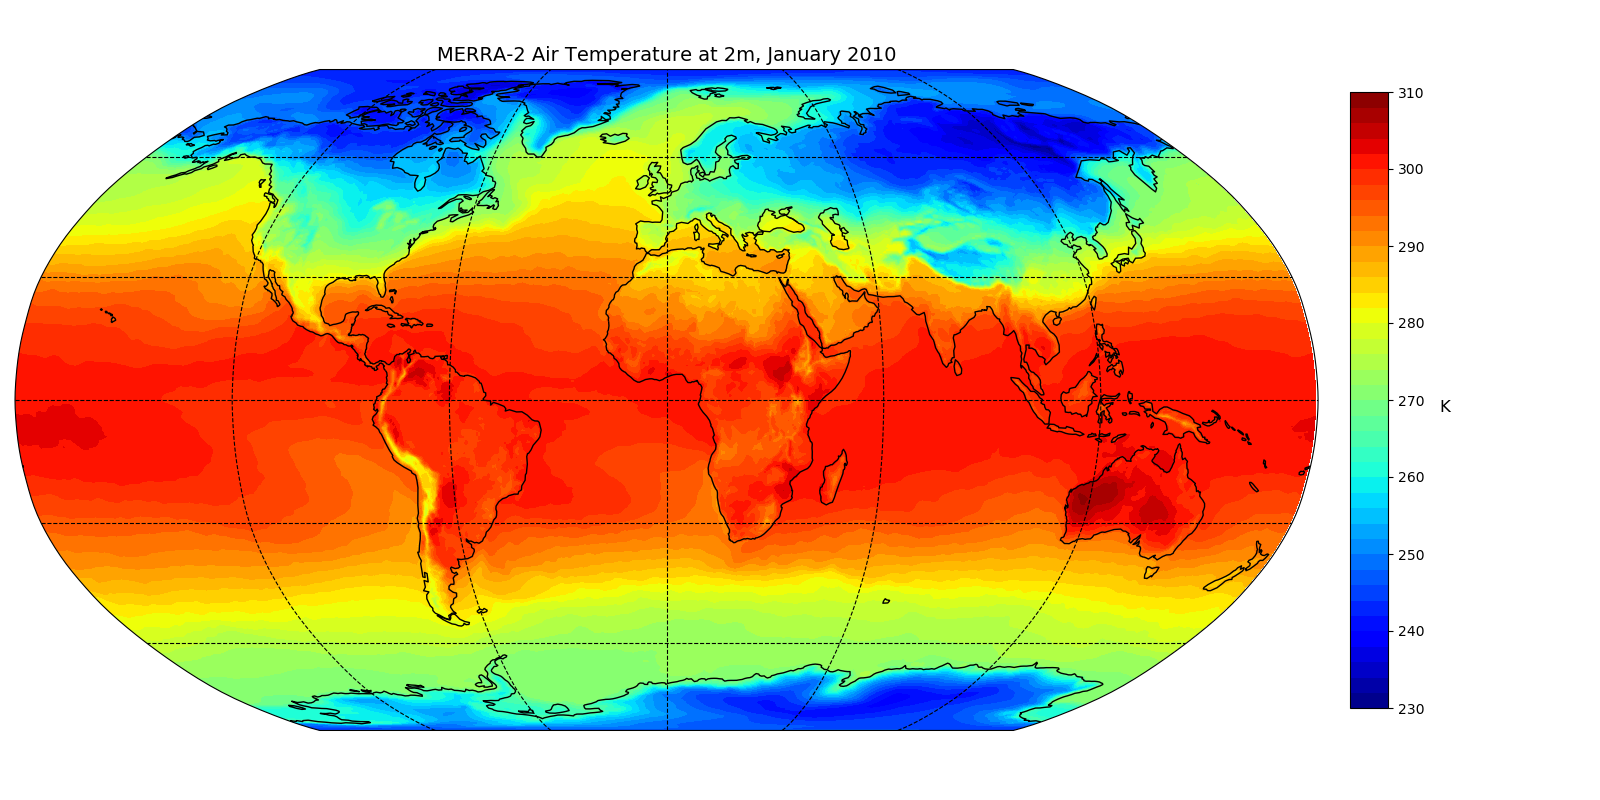

In [70]:
## Set the figure size, projection, and extent
#fig = plt.figure(figsize=(16,8))
#ax = plt.axes(projection=ccrs.Robinson())
#ax.set_global()
#ax.coastlines(resolution="110m",linewidth=1)
#ax.gridlines(linestyle='--',color='black')

## Set contour levels, then draw the plot and a colorbar
#clevs = np.arange(230,311,2)
#plt.contourf(lon, lat, T2M, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
#plt.title('MERRA-2 Air Temperature at 2m, January 2010', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
#cb.set_label('K',size=12,rotation=0,labelpad=15)
#cb.ax.tick_params(labelsize=10)

In [62]:
## Save the figure as a PNG image
#fig.savefig('MERRA2_t2mRobinson.png', format='png', dpi=100)

<IPython.core.display.Javascript object>


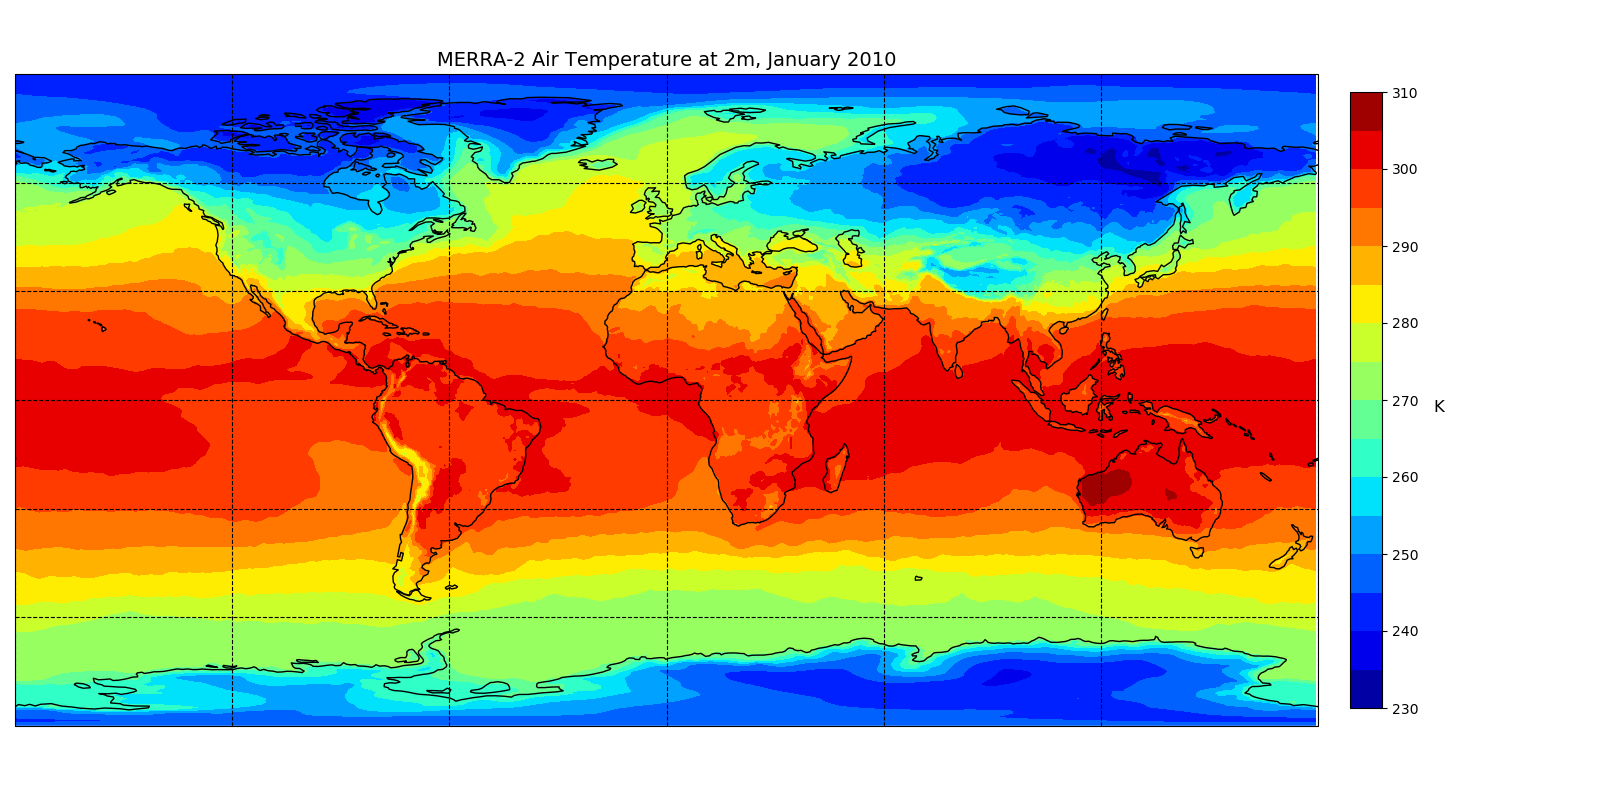

In [63]:
## Set the figure size, projection, and extent
#fig = plt.figure(figsize=(16,8))
#ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None)) #  ccrs.Robinson())
#ax.set_global()
#ax.coastlines(resolution="110m",linewidth=1)
#ax.gridlines(linestyle='--',color='black')

## Set contour levels, then draw the plot and a colorbar
#clevs = np.arange(230,311,5)
#plt.contourf(lon, lat, T2M, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
#plt.title('MERRA-2 Air Temperature at 2m, January 2010', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=19, shrink=0.8)
#cb.set_label('K',size=12,rotation=0,labelpad=15)
#cb.ax.tick_params(labelsize=10)

In [64]:
## Save the figure as a PNG image
#fig.savefig('MERRA2_t2mPlate.png', format='png', dpi=100)



## II. Data Connections BETER Overview:
We download data of BETR, read the specific text file (means of data done over a range of years on 12 months and 288 cells regions)

In [65]:
import numpy as np
import cartopy.feature as cpf
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import pandas as pd
import matplotlib.animation as animation
import math


In [66]:
dataBtr = pd.read_table('seasonal_parameters_20C3M.a2.comp.ivm.moh_add2mix_esrl_br.txt', sep=" ",comment='#', header=None)
dataBtr = dataBtr.iloc[:, :-2]
dataBtr.columns=["CELL", "TimeSteps", "OHair1", "OHair2", "precip", "stwet", "stdry", "tair1", "tair2", "tocean", "tland", "h1", "h2", "h5", "mixing12", "mixing21", "runoff6water", "tspe", "perc8"]
print(dataBtr)

      CELL  TimeSteps    OHair1    OHair2    precip      stwet       stdry  \
0        1          1  0.001541  0.001596  0.013070   6.047956  607.327272   
1        1          2  0.004328  0.003043  0.013051   4.852964  589.244111   
2        1          3  0.049774  0.028056  0.014846   6.120092  563.494028   
3        1          4  0.239254  0.182145  0.015072   6.342411  536.940760   
4        1          5  0.734019  0.785966  0.032566   9.718472  410.705193   
...    ...        ...       ...       ...       ...        ...         ...   
3451   288          8  0.001715  0.001306  0.053117  18.399381  344.634024   
3452   288          9  0.053621  0.034376  0.065765  16.194068  342.208092   
3453   288         10  0.266164  0.210442  0.050715  13.703062  319.520946   
3454   288         11  0.572537  0.547531  0.050290  11.815198  314.337427   
3455   288         12  0.683863  0.610815  0.038546  11.607969  323.966382   

           tair1       tair2      tocean       tland           

Extract only first months

In [67]:
JanuaryMask = (dataBtr["TimeSteps"] == 1)
JanuaryData = dataBtr[JanuaryMask]
JanuaryData = JanuaryData.reset_index()
print(JanuaryData)

     index  CELL  TimeSteps    OHair1    OHair2    precip      stwet  \
0        0     1          1  0.001541  0.001596  0.013070   6.047956   
1       12     2          1  0.001530  0.001576  0.011059   5.860404   
2       24     3          1  0.001547  0.001489  0.010816   3.774679   
3       36     4          1  0.001513  0.001395  0.007480   3.725706   
4       48     5          1  0.001427  0.001293  0.042748  12.458660   
..     ...   ...        ...       ...       ...       ...        ...   
283   3396   284          1  0.628524  0.804875  0.018822   4.094147   
284   3408   285          1  0.624827  0.796482  0.009966   1.445810   
285   3420   286          1  0.623754  0.774260  0.014173   4.520440   
286   3432   287          1  0.619471  0.697290  0.017177   6.776436   
287   3444   288          1  0.570066  0.435579  0.036029  12.657883   

          stdry       tair1       tair2      tocean       tland           h1  \
0    607.327272  236.847846  250.336112  271.250229 -99

The coordinate (x and y) of each cell on the map composed of 24 x 12 cells are calculated

In [68]:
xCell = np.linspace(-12, 12, 24)
yCell = np.linspace(-6, 6, 12)


#In BETR, each cells have a 15 degreesx 15 degrees. Then we convert
xCell=xCell*15
yCell=yCell*15

X, Y = np.meshgrid(xCell, yCell)

data = np.array(JanuaryData.tair2)
Z = np.reshape(data, (-1, 24))
print(X.shape,Y.shape,Z.shape)




(12, 24) (12, 24) (12, 24)


<IPython.core.display.Javascript object>


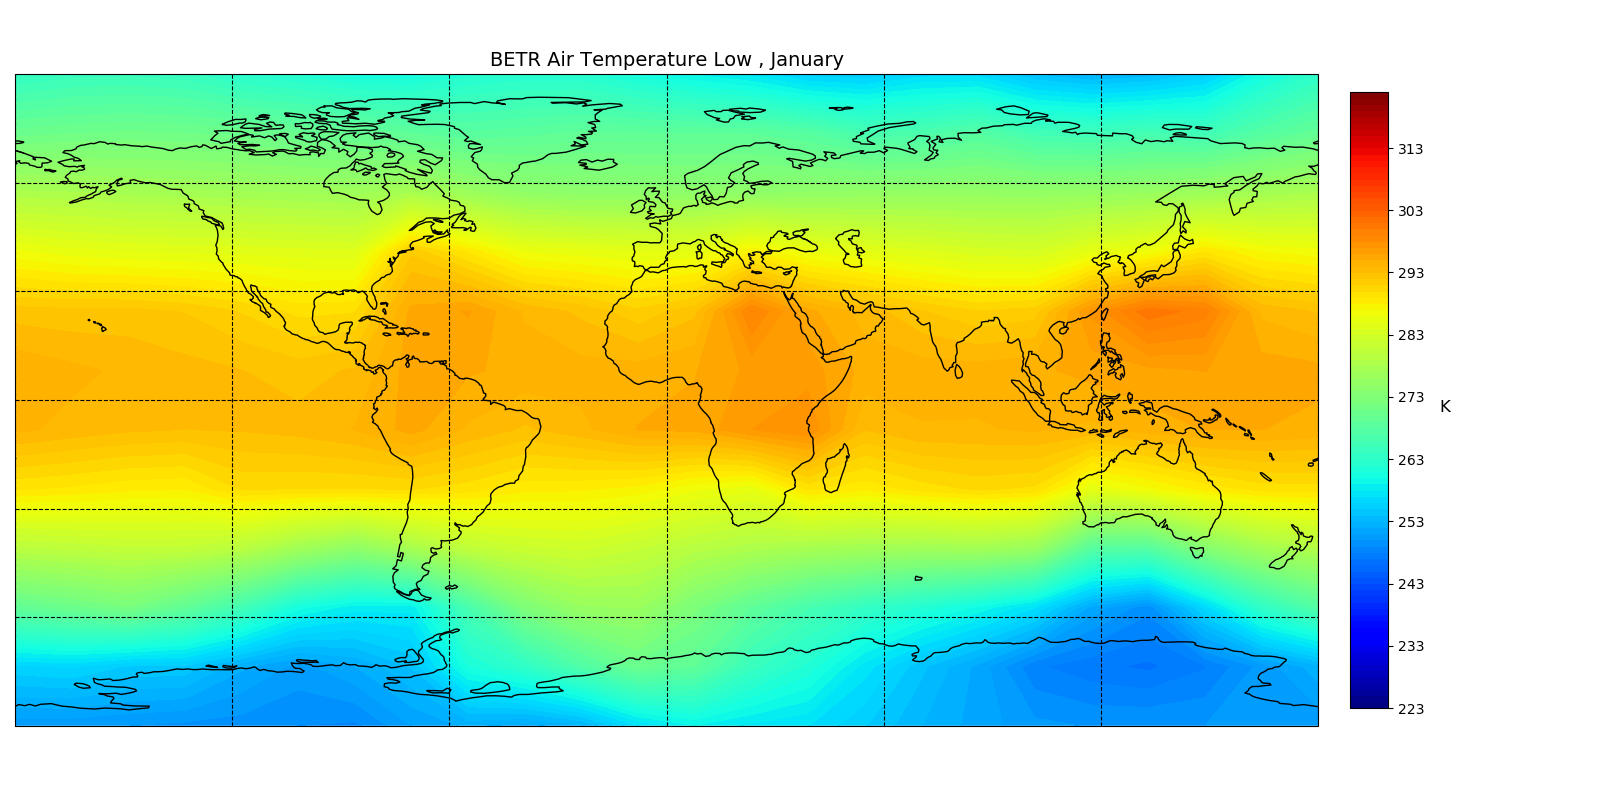

In [69]:
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None)) #  ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--', color='black')


clevs = np.arange(223,323,1) #-50 C to 40C

#plt.contourf(X, Y, Z , 60, cmap='RdGy')
#plt.contourf(X, Y, Z , clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)


plt.contourf(X, Y, Z , clevs, cmap=plt.cm.jet)

plt.title('BETR Air Temperature Low , January', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)


## III. Maps motions (BETR):


** Spatial and temporal visualization of water demands in a basin


From https://waterprogramming.wordpress.com/2019/06/11/spatial-and-temporal-visualization-of-water-demands-in-a-basin/
First, I load up all necessary packages and data. structures contains the X and Y coordinates of all the diversion points; demands and shortages contain monthly data of water demand and shortage for each diversion point. 

[      CELL  TimeSteps    OHair1    OHair2    precip      stwet       stdry  \
0        1          1  0.001541  0.001596  0.013070   6.047956  607.327272   
12       2          1  0.001530  0.001576  0.011059   5.860404  596.103351   
24       3          1  0.001547  0.001489  0.010816   3.774679  627.900422   
36       4          1  0.001513  0.001395  0.007480   3.725706  652.280149   
48       5          1  0.001427  0.001293  0.042748  12.458660  338.128472   
...    ...        ...       ...       ...       ...        ...         ...   
3396   284          1  0.628524  0.804875  0.018822   4.094147  608.663067   
3408   285          1  0.624827  0.796482  0.009966   1.445810  678.451602   
3420   286          1  0.623754  0.774260  0.014173   4.520440  610.165577   
3432   287          1  0.619471  0.697290  0.017177   6.776436  558.916626   
3444   288          1  0.570066  0.435579  0.036029  12.657883  305.193434   

           tair1       tair2      tocean       tland          

<IPython.core.display.Javascript object>


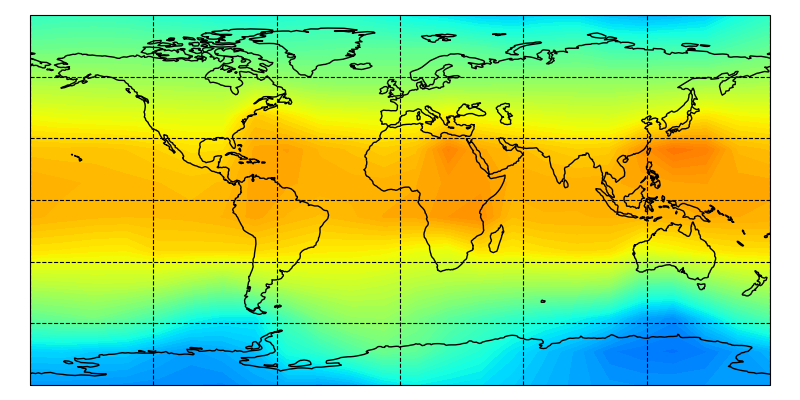

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


IndexError: list index out of range

In [54]:
#import numpy as np
#import cartopy.feature as cpf
#import cartopy.crs as ccrs
#import cartopy.io.img_tiles as cimgt
#import pandas as pd
#import math
 
##Enable interactive polt
#%matplotlib notebook

##Needed libraries
#import matplotlib.animation as animation
#from matplotlib.animation import FuncAnimation
#import matplotlib.pyplot as plt


##Import All Data from Betr    
#dataBtr = pd.read_table('seasonal_parameters_20C3M.a2.comp.ivm.moh_add2mix_esrl_br.txt', sep=" ",comment='#', header=None)
#dataBtr = dataBtr.iloc[:, :-2]
#dataBtr.columns=["CELL", "TimeSteps", "OHair1", "OHair2", "precip", "stwet", "stdry", "tair1", "tair2", "tocean", "tland", "h1", "h2", "h5", "mixing12", "mixing21", "runoff6water", "tspe", "perc8"]


##Extract these data by months
#MonthDataList = []

#for i in range (1,13):
#    MonthMask = (dataBtr["TimeSteps"] == i)
#    Data = dataBtr[MonthMask]
#    MonthDataList.append([Data])

#print(MonthDataList[0])

#print("+++++++++++++++++++++++++++++++++++")    


##Define the coordinate of cells for the map

#xCell = np.linspace(-12, 12, 24)
#yCell = np.linspace(-6, 6, 12)

##In BETR, each cells have a 15 degreesx 15 degrees. Then we convert
#xCell=xCell*15
#yCell=yCell*15

#X, Y = np.meshgrid(xCell, yCell)

## As Z, the data represented, extract tair2 data and 
#Z = []
#for i in range (1,13):
#    data = MonthDataList[i-1][0]
#    dataSpecific = np.array(data.tair2)
#    #Reshape for map creation
#    Z.append([np.reshape(dataSpecific, (-1, 24))])
#   # print(i, X.shape,Y.shape,Z[0][0])


##print(Z[2][0])    



## Get a handle on the figure and the axes
#fig, ax = plt.subplots(figsize=(8,4))

## Set the figure size, projection, and extent
#ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None)) #  ccrs.Robinson())
#ax.set_global()
#ax.coastlines(resolution="110m",linewidth=1)
#ax.gridlines(linestyle='--', color='black')

#clevs = np.arange(223,323,1) #-50 C to 40C


## Plot the initial frame. 
#cax = plt.contourf(X, Y, Z[0][0] , clevs, cmap=plt.cm.jet)


## Next we need to create a function that updates the values for the colormesh, as well as the title.
#def animate(frame):
#    cax.clear()
#    cax = plt.contourf(X, Y, Z[frame][0] , clevs, cmap=plt.cm.jet)
#    #cax.set_array(tas[frame,:,:].values.flatten())
#    #ax.set_title("Time = " + str(tas.coords['time'].values[frame])[:13])

## Finally, we use the animation module to create the animation.
#ani = animation.FuncAnimation(
#    fig,             # figure
#    animate,         # name of the function above
#    frames=12,       # Could also be iterable or list
#interval=200     # ms between frames
#)

#ani.save('Python_Animation_04.mp4')

[      CELL  TimeSteps    OHair1    OHair2    precip      stwet       stdry  \
0        1          1  0.001541  0.001596  0.013070   6.047956  607.327272   
12       2          1  0.001530  0.001576  0.011059   5.860404  596.103351   
24       3          1  0.001547  0.001489  0.010816   3.774679  627.900422   
36       4          1  0.001513  0.001395  0.007480   3.725706  652.280149   
48       5          1  0.001427  0.001293  0.042748  12.458660  338.128472   
...    ...        ...       ...       ...       ...        ...         ...   
3396   284          1  0.628524  0.804875  0.018822   4.094147  608.663067   
3408   285          1  0.624827  0.796482  0.009966   1.445810  678.451602   
3420   286          1  0.623754  0.774260  0.014173   4.520440  610.165577   
3432   287          1  0.619471  0.697290  0.017177   6.776436  558.916626   
3444   288          1  0.570066  0.435579  0.036029  12.657883  305.193434   

           tair1       tair2      tocean       tland          

<IPython.core.display.Javascript object>


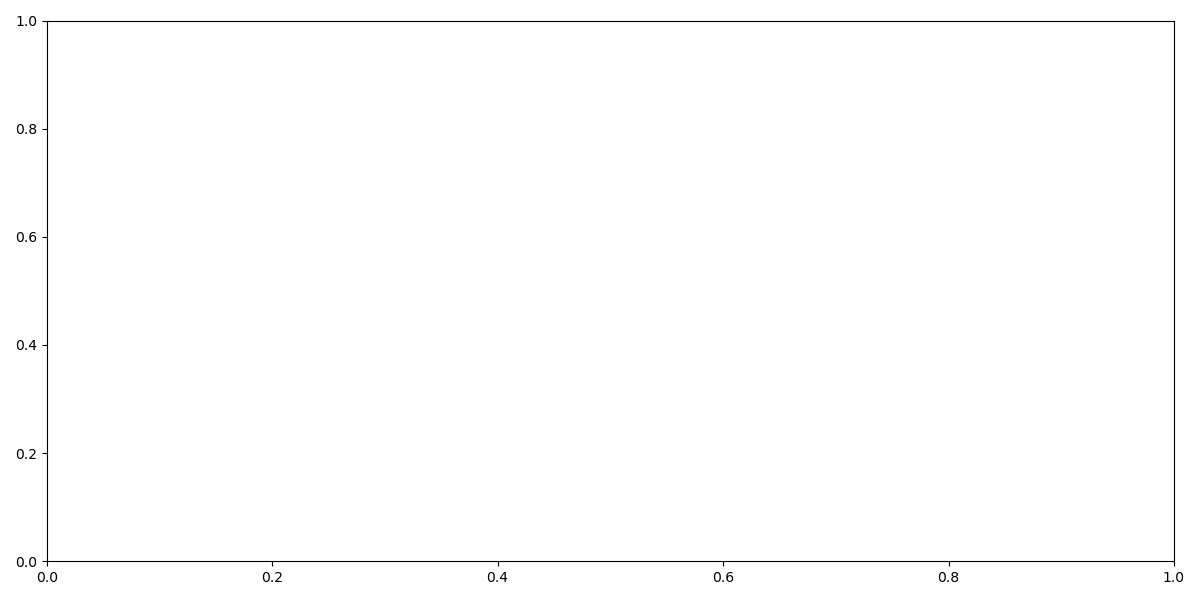

<IPython.core.display.Javascript object>


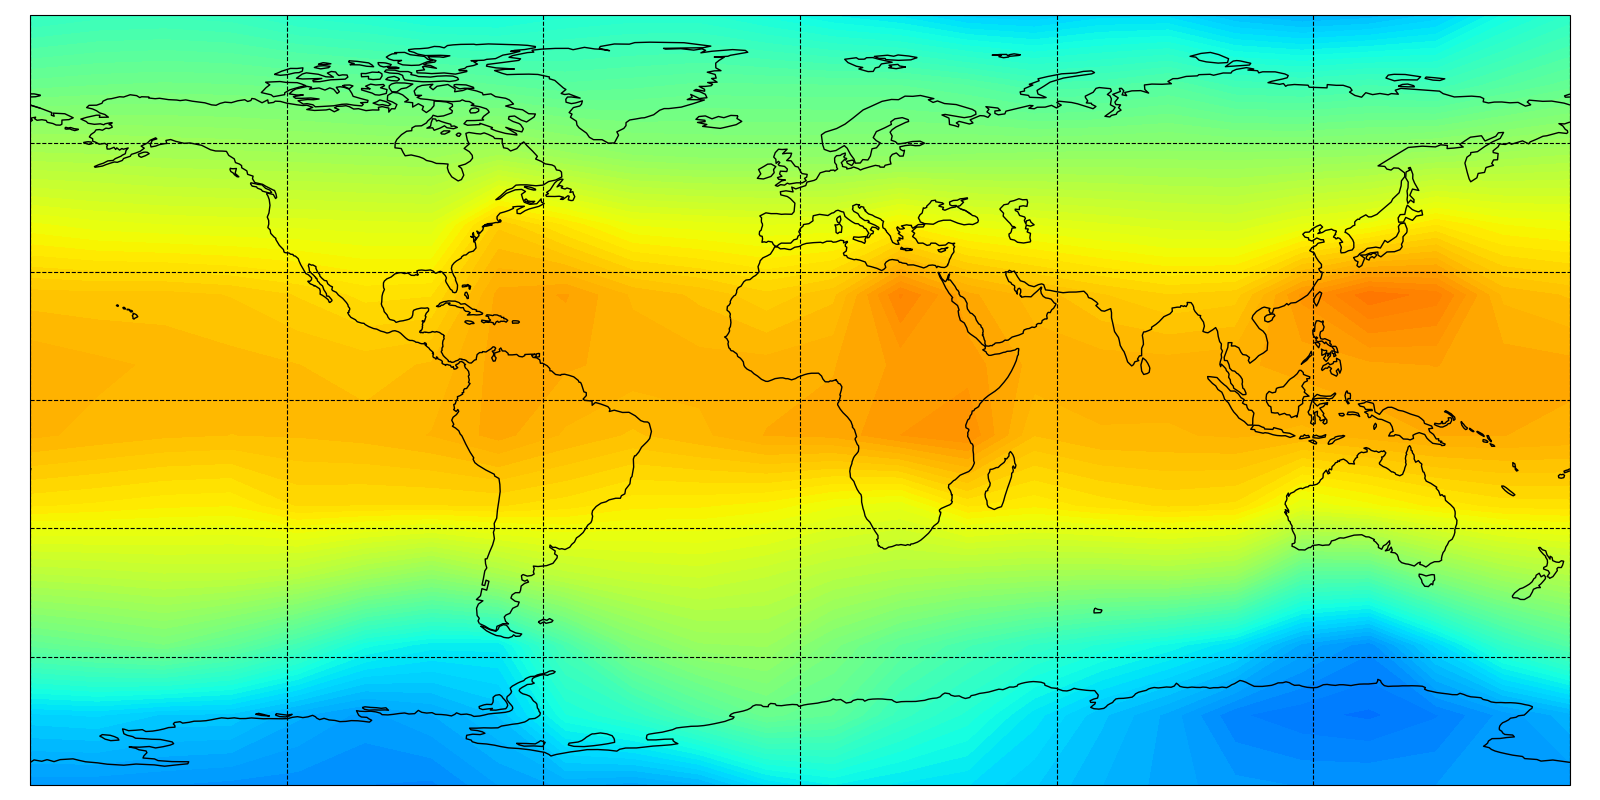

TypeError: Length of x must be number of columns in z.

In [42]:
import numpy as np
import cartopy.feature as cpf
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import pandas as pd
import math
 
#Enable interactive polt
%matplotlib notebook

#Needed libraries
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib import pyplot as plt


    
#structures = pd.read_csv('modeled_diversions.csv',index_col=0)
#demands = pd.read_csv('demands.csv',index_col=0)
#shortages = pd.read_csv('shortages.csv',index_col=0)

#Import All Data from Betr    
dataBtr = pd.read_table('seasonal_parameters_20C3M.a2.comp.ivm.moh_add2mix_esrl_br.txt', sep=" ",comment='#', header=None)
dataBtr = dataBtr.iloc[:, :-2]
dataBtr.columns=["CELL", "TimeSteps", "OHair1", "OHair2", "precip", "stwet", "stdry", "tair1", "tair2", "tocean", "tland", "h1", "h2", "h5", "mixing12", "mixing21", "runoff6water", "tspe", "perc8"]




MonthDataList = []

for i in range (1,13):
    MonthMask = (dataBtr["TimeSteps"] == i)
    Data = dataBtr[MonthMask]
    MonthDataList.append([Data])

print(MonthDataList[0])

print("+++++++++++++++++++++++++++++++++++")    


xCell = np.linspace(-12, 12, 24)
yCell = np.linspace(-6, 6, 12)

#In BETR, each cells have a 15 degreesx 15 degrees. Then we convert
xCell=xCell*15
yCell=yCell*15

X, Y = np.meshgrid(xCell, yCell)

Z = []
for i in range (1,13):
    data = MonthDataList[i-1][0]
    dataSpecific = np.array(data.tair2)

    Z.append([np.reshape(dataSpecific, (-1, 24))])
   # print(i, X.shape,Y.shape,Z[0][0])


print(Z[2][0])    

# Set the figure size, projection, and extent
#fig = plt.figure(figsize=(16,8))
#ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None)) #  ccrs.Robinson())
#ax.set_global()
#ax.coastlines(resolution="110m",linewidth=1)
#ax.gridlines(linestyle='--', color='black')


#clevs = np.arange(223,323,1) #-50 C to 40C


# Initialize the array with the initial Values.
#arr = [Z[0][0],Z[1][0]]

# Plot the filled and line contours, and the outline of the mask.
#cf = ax.contourf(arr, cmap='RdYlBu')
#plt.contourf(X, Y, Z[0][0] , clevs, cmap=plt.cm.jet)

#plt.title('BETR Air Temperature Low , January', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
#cb.set_label('K',size=12,rotation=0,labelpad=15)
#cb.ax.tick_params(labelsize=10)
#



#plt.contourf(X, Y, Z , 60, cmap='RdGy')
#plt.contourf(X, Y, Z , clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)


# animation function
#def animate(i):
#    global plt
#    z_i = (Z[i][0]) 
#    for c in plt.collections:
#        c.remove()  # removes only the contours, leaves the rest intact
#    cont = plt.contourf(X, Y, z_i, clevs, cmap=plt.cm.jet)
#    plt.title('t = %i:  %.2f' % (i))
#    return cont


# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))

# Set the figure size, projection, and extent
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None)) #  ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--', color='black')

clevs = np.arange(223,323,1) #-50 C to 40C


# Plot the initial frame. 
cax = plt.contourf(X, Y, Z[0][0] , clevs, cmap=plt.cm.jet)


# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    #cax.set_array(tas[frame,:,:].values.flatten())
    ax.set_title("Time = " + str(tas.coords['time'].values[frame])[:13])

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=12,       # Could also be iterable or list
    interval=200     # ms between frames
)




# animation function
def animate(i):
    ax.clear()
    draw(i)
    return ax,

draw(0)

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), interval=10, blit=True)

#plt.contourf(X, Y, Z , clevs, cmap=plt.cm.jet)

#plt.title('BETR Air Temperature Low , December', size=14)
#cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
#cb.set_label('K',size=12,rotation=0,labelpad=15)
#cb.ax.tick_params(labelsize=10)
    

<IPython.core.display.Javascript object>


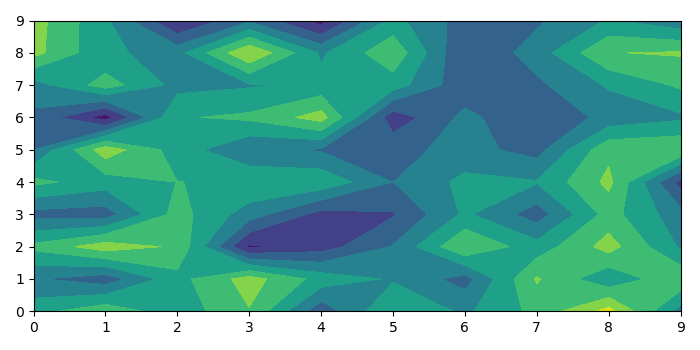

In [23]:
import numpy as np


#Enable interactive polt
%matplotlib notebook

#Needed libraries
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
data = np.random.randn(800).reshape(10, 10, 8)
fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.contourf(data[:, :, i])

ani = animation.FuncAnimation(fig, animate, 5, interval=50, blit=False)
anim.save('testMotionContour.gif', writer='imagemagick', fps=5)
plt.show()

<IPython.core.display.Javascript object>


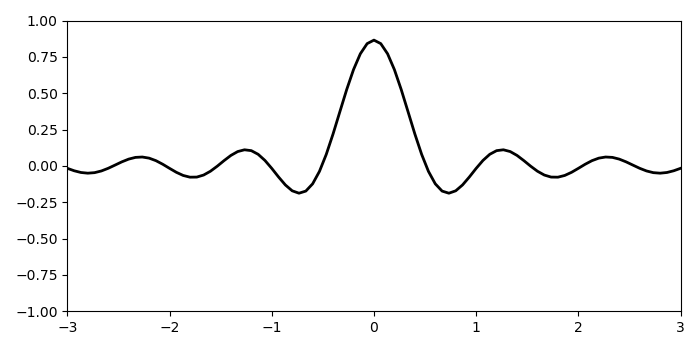

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [15]:
import numpy as np

#Enable interactive polt
%matplotlib notebook

#Needed libraries
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True


#Inital state of the animation figure
fig, ax = plt.subplots()

ax.set(xlim=(-3, 3), ylim=(-1, 1))
x = np.linspace(-3, 3, 91)
t = np.linspace(1, 25, 30)
X2, T2 = np.meshgrid(x, t)
sinT2 = np.sin(2 * np.pi * T2 / T2.max())
F = 0.9 * sinT2 * np.sinc(X2 * (1 + sinT2))
line, = ax.plot(x, F[0, :], color='k', lw=2)

def animate(i):
   line.set_ydata(F[i, :])

anim = animation.FuncAnimation(fig, animate, interval=100, frames=len(t) - 1)
anim.save('503.gif')
plt.show()

Traceback (most recent call last):
  File "/Users/marianne/opt/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/marianne/opt/miniconda3/lib/python3.8/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


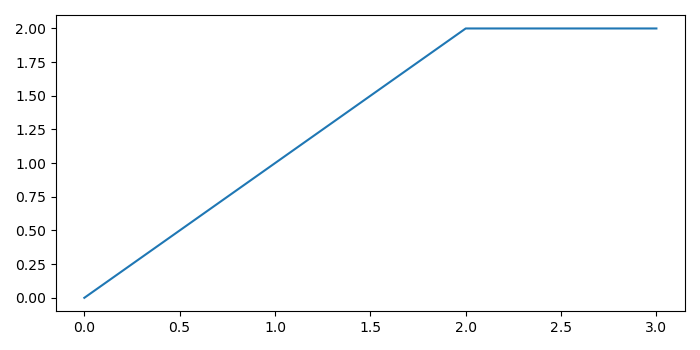

In [20]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget
# aka import ipympl

import matplotlib.pyplot as plt

plt.plot([0, 1, 2, 2])
plt.show()

<IPython.core.display.Javascript object>


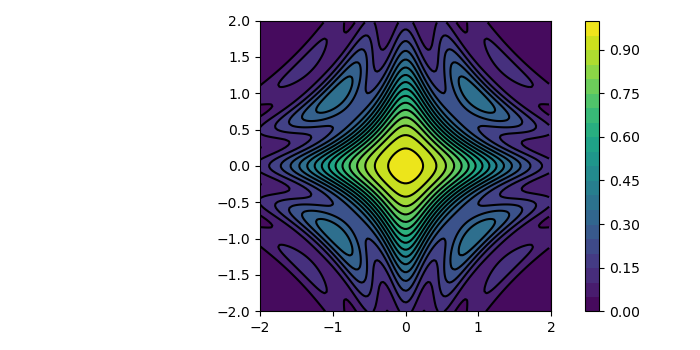

In [35]:
# based on sample by: Roberto Colistete Jr.
# extended with animation by: MASBicudo ()

#Enable interactive polt
%matplotlib notebook


import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from pylab import *

##############################################################################
## Personalize your plot parameters here.
## x values from xi to xf with numx points being sampled :
xi = -2.0; xf = 2.0; numx = 150
## y values from yi to yf with numy points being sampled :
yi = -2.0; yf = 2.0; numy = 150
## z = f(x,y), just change the expression after 'return' :
def f(x,y,i):
     return (cos(pi*x*y)**2+i/20.0)*exp(-(x**2+y**2)/2)
## Option (True/False) to fill the gaps between contours :
contourfillflag = True
## Option (True/False) to only fill the gaps between contours, without drawing 
## the contours :
contourfillonlyflag = False
## Contour levels can be True (automatic), the number of leves or the list of 
## z levels :
# contourlevels = True
contourlevels = 20
# contourlevels = linspace(0.0,1.0,10)
# contourlevels = (0.0,0.2,0.4,0.6,0.8,1.0)
## Option (True/False) to show automatic contour labels  :
contourlabelsflag = False
## Option (True/False) to show a vertical color bar of the contour levels  :
contourlevelsbarflag = True
## Labels for x and y axis :
xlabeltext = r'x'; ylabeltext = r'y'
## Plot title, here including TeX expressions (inside '$') :
titletext = r'$f(x,y)=\,\cos(\pi\,x\,y)^2 e^{-\frac{x^2+y^2}{2}}$'
## Option (True/False) to show a grid of dashed lines :
gridflag = True
##############################################################################

fig,ax = plt.subplots()

x = np.arange(xi, xf, (xf-xi)/(numx-1))
y = np.arange(yi, yf, (yf-yi)/(numy-1))
X,Y = np.meshgrid(x, y)

def draw(i):
    z = f(X,Y,i)
    extent = (xi, xf, yi, yf)
    ax.imshow(z, extent=extent)
    if contourfillflag:
        if contourlevels == True:
            if not contourfillonlyflag:
                c1 = ax.contour(x,y,z,colors='k')
            c2 = ax.contourf(x,y,z)
        else:
            if not contourfillonlyflag:
                c1 = ax.contour(x,y,z,contourlevels,colors='k')
            c2 = ax.contourf(x,y,z,contourlevels)
        if contourlevelsbarflag and i == 0:
            cb2 = fig.colorbar(c2)
    else:
        if contourlevels == True:
            c1 = ax.contour(x,y,z)
        else:
            c1 = ax.contour(x,y,z,contourlevels)
        if contourlevelsbarflag and i == 0:
            fig.colorbar(c1)
    if contourlabelsflag and ((not contourfillflag) or (not contourfillonlyflag)) and i == 0:
        l1 = ax.clabel(c1)

plt.grid(gridflag)
plt.xlabel(xlabeltext); plt.ylabel(ylabeltext); plt.title(titletext)

def animate(i):
    ax.clear()
    draw(i)
    return ax,

draw(0)

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), interval=10, blit=True)

plt.show()

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import matplotlib.colors as colors
from numpy import array
from numpy import max
import numpy as np

plt.figure()
filename = "data/Justin/icepmag_20190118.csv"
frame = pd.read_csv(filename)

frame.head()
# replace -9999 by NaN (missing values)
frame.replace(-9999.0,np.NaN, inplace=True)
# remove rows where lon or lat are missing
frame.dropna(subset=['lon', 'lat'], inplace=True)
# drop duplicates
latlons = frame[['lat', 'lon']].drop_duplicates()

map = Basemap(llcrnrlon=335,llcrnrlat=63.0,urcrnrlon=348.,urcrnrlat=67.,
             resolution='i', projection='tmerc', lat_0 = 64.5, lon_0 = 340)


x,y = map(latlons['lon'].values,latlons['lat'].values)
map.hexbin(x,y, gridsize=20, mincnt=1, cmap='summer', norm=colors.LogNorm())


map.drawcoastlines()
plt.show()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


ValueError: unknown file extension: .mp4

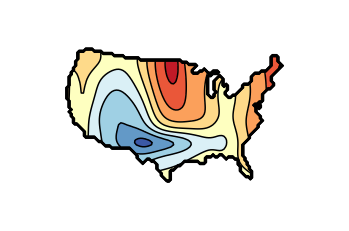

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image

SAVE_ANIMATION = True

# The mask image to use: only plot contours on the black area.
img = Image.open('us_100.png')
mask = np.array(img)[::-1,:,:].mean(axis=2) < 128

# Number of 2D Gaussian functions to use, size of the plot array.
ng = 80
nx, ny = 100, 100
arr = np.zeros((nx, ny))

# Scaling factors for random initialization of Gaussian parameters.
sigma = 20
A = 1
g_prms = np.array(
                 (np.random.random(ng) * nx,
                  np.random.random(ng) * ny,
                  sigma * (np.random.random(ng) + 0.2),
                  sigma * (np.random.random(ng) + 0.2),
                  A * np.random.random(ng))
                 )

# Meshgrid of 2D coordinates.
x, y = np.arange(0, nx), np.arange(0, ny)
X, Y = np.meshgrid(x, y)

def gaussian(prms):
    """Return the 2D Gaussian function defined by prms."""
    x0, y0, sig_x, sig_y, A = prms
    return A[:,None,None] * np.exp(
                - ((X-x0[:,None,None]) / sig_x[:,None,None])**2
                - ((Y-y0[:,None,None]) / sig_y[:,None,None])**2
                                  )
# Initialize the array with the initial Gaussian parameters.
arr = np.sum(gaussian(g_prms), axis=0)

# Start the figure, make sure it's square and turn off the Axes labels.
fig, ax = plt.subplots()
ax.axis('equal')
ax.axis('off')

# Plot the filled and line contours, and the outline of the mask.
cf = ax.contourf(arr, cmap='RdYlBu')
c = ax.contour(arr, colors='k')
ax.contour(mask, colors='k')

# These parameters determine how fast the Gaussian parameters change.
vx, vy = 4, 4
vsig_x, vsig_y = 0.2, 0.2
vA = 0.05
sc = np.array((vx, vy, vsig_x, vsig_y, vA)).reshape(5, 1)

def animate(i):
    """Set the data for the ith iteration of the animation."""

    global c, cf, arr, g_prms

    # Advance the parameters, update the array, and apply the mask.
    g_prms += sc * (1 - 2*np.random.random((5, ng)))
    arr = np.sum(gaussian(g_prms), axis=0)
    arr[~mask] = np.nan
    # Update the plot objects: remove the previous collections to save memory.
    for coll in cf.collections:
        coll.remove()
    cf = ax.contourf(arr, cmap='RdYlBu')
    for coll in c.collections:
        coll.remove()
    c = ax.contour(arr, colors='k')
    return c, cf

if SAVE_ANIMATION:
    anim = animation.FuncAnimation(fig, animate, frames=100, repeat=False)
    anim.save('us.gif', writer='imagemagick', fps=5)
    anim.save('animation.mp4', fps=10,  dpi=150)


else:
    anim = animation.FuncAnimation(fig, animate, frames=100)

    plt.show()


Then, I set up the extent of my map (i.e., the region I would like to show). rivers_10m loads the river “feature” at a 10m resolution. There’s a lot of different features that can be added (coastlines, borders, etc.). Finally, I load the tiles which is basically the background map image (many other options also). 

In [ ]:
arr = np.array([[1, 2, 3]])
arr2 = np.array([4, 5, 6])
arr = np.append(arr, [arr2], axis=0)
arr3 = np.array([7, 8, 9])
arr = np.append(arr, [arr3], axis=0)
print(arr[1])

In [ ]:
extent = [-109.069,-105.6,38.85,40.50]
rivers_10m = cpf.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')
tiles = cimgt.StamenTerrain()

I draw the figure more or less as I would in matplotlib, using the matplotlib scatter to draw my demand and shortage points. The rest of the lines are basically legend customization by creating dummy artists to show max demands and shortages in the legend. 

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=tiles.crs)
ax.add_feature(rivers_10m, facecolor='None', edgecolor='b')
ax.add_image(tiles, 9, interpolation='none')
ax.set_extent(extent)
dem_points = ax.scatter(structures['X'], structures['Y'], marker = '.', s = demands['0']/50, c = 'dodgerblue', transform=ccrs.Geodetic())
short_points = ax.scatter(structures['X'], structures['Y'], marker = '.', s = shortages['0']/50, c = 'coral' ,transform=ccrs.Geodetic())
l2 = ax.scatter(-110,37, s=demands.values.max()/50, c = 'dodgerblue', transform=ccrs.Geodetic())
l4 = ax.scatter(-110,37, s=shortages.values.max()/50, c = 'coral',transform=ccrs.Geodetic())
dem_label = ax.scatter(-110,37, s=0, transform=ccrs.Geodetic())
short_label = ax.scatter(-110,37, s=0, transform=ccrs.Geodetic())
labels = ['Max Demand' , str(demands.values.max()) + ' af', 
          'Max Shortage' , str(shortages.values.max()) + ' af']
legend = ax.legend([dem_label, l2, short_label, l4], labels, ncol=2, loc = 'upper left', title = 'Month: '+ str((0 + 10) % 12 +1) + '/' + str(int(math.floor(0/12))+1908)+'\n', fontsize=10, title_fontsize = 14, borderpad=2, handletextpad = 1.3)

In [ ]:
def update_points(num, dem_points, short_points, legend):
    dem_points.set_sizes(demands[str(num)]/10)
    short_points.set_sizes(shortages[str(num)]/10)
    legend.set_title('Month: '+ str((num + 10) % 12 +1) + '/' + str(int(math.floor(num/12))+1908))
    return dem_points, short_points, legend 
        
anim = animation.FuncAnimation(fig, update_points, 120, fargs=(dem_points, short_points, legend),
                                   interval=200, blit=False)
anim.save('basin_animation.mp4', fps=10,  dpi=150, extra_args=['-vcodec', 'libx264'])